<!DOCTYPE html>
<html>
  <head>
    <style>
      /* CSS styles for formatting and layout */
      h1 {
        text-align: center;
        font-size: 2em;
      }
      p {
        text-align: justify;
        font-size: 1.2em;
        line-height: 1.5em;
        margin: 1em;
      }
      img {
        display: block;
        margin: 0 auto;
        width: 50%;
      }
    </style>
  </head>
  <body>
    <h1>Intrusion Detection on Internet of Vehicles by Federated Learning </h1>
    <h4>Abhishek Sebastian and Pragna R</h4>
    <p>Federated Learning is a method of training machine learning models in which data is distributed across multiple devices or locations, rather than being centralized in a single location. Each device, or "edge" device, trains a local version of the model using its own data, and then periodically sends updates to a central server, which aggregates the updates to improve the overall model. </p>
    <img src="https://theblue.ai/wp-content/uploads/2019/09/Illustration_Data-owner-1.jpg" alt="Federated Learning diagram">
    <p>This allows for models to be trained on a much larger and more diverse dataset, and also helps to protect the privacy of users by keeping their data on their own devices.</p>
  </body>
</html>


---



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install catboost
import catboost as cbt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pickle

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset : CICIDS2017

In [7]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ISM/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv")
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Dividing the dataset into three parts.


> The data set is divided into three equal parts to simulate individial data from users. 




In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ISM/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample.csv")
df = df.dropna()
df = df[df['Label']!=' ']

# Divide the data into three parts
X = df.drop('Label', axis=1)
y = df['Label']

X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=0)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.5, random_state=0)


### Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.

> Virtual edge machine 1

0:	learn: 1.5009464	total: 275ms	remaining: 27.2s
1:	learn: 1.2426253	total: 443ms	remaining: 21.7s
2:	learn: 1.0663028	total: 650ms	remaining: 21s
3:	learn: 0.9347588	total: 810ms	remaining: 19.4s
4:	learn: 0.8311199	total: 998ms	remaining: 19s
5:	learn: 0.7426891	total: 1.16s	remaining: 18.1s
6:	learn: 0.6703354	total: 1.31s	remaining: 17.5s
7:	learn: 0.6077431	total: 1.49s	remaining: 17.1s
8:	learn: 0.5532821	total: 1.69s	remaining: 17s
9:	learn: 0.5074359	total: 1.84s	remaining: 16.6s
10:	learn: 0.4680224	total: 2.04s	remaining: 16.5s
11:	learn: 0.4308816	total: 2.35s	remaining: 17.3s
12:	learn: 0.3993349	total: 2.52s	remaining: 16.9s
13:	learn: 0.3707345	total: 2.7s	remaining: 16.6s
14:	learn: 0.3450230	total: 2.86s	remaining: 16.2s
15:	learn: 0.3221796	total: 3.03s	remaining: 15.9s
16:	learn: 0.3010931	total: 3.17s	remaining: 15.5s
17:	learn: 0.2829878	total: 3.32s	remaining: 15.1s
18:	learn: 0.2649512	total: 3.48s	remaining: 14.8s
19:	learn: 0.2501879	total: 3.65s	remaining: 14.

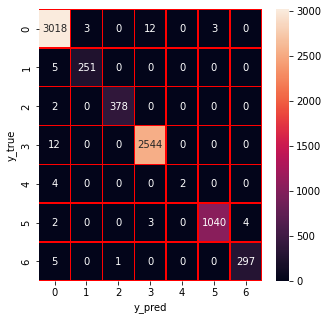

In [9]:

# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=100, learning_rate=0.1)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



> 



> Virtual edge machine 2

0:	learn: 1.5269095	total: 282ms	remaining: 27.9s
1:	learn: 1.2959415	total: 475ms	remaining: 23.3s
2:	learn: 1.1116740	total: 736ms	remaining: 23.8s
3:	learn: 0.9794070	total: 984ms	remaining: 23.6s
4:	learn: 0.8770088	total: 1.18s	remaining: 22.4s
5:	learn: 0.7912102	total: 1.36s	remaining: 21.4s
6:	learn: 0.7189912	total: 1.57s	remaining: 20.9s
7:	learn: 0.6572273	total: 1.78s	remaining: 20.5s
8:	learn: 0.6039053	total: 1.94s	remaining: 19.6s
9:	learn: 0.5553461	total: 2.17s	remaining: 19.5s
10:	learn: 0.5139056	total: 2.45s	remaining: 19.8s
11:	learn: 0.4782122	total: 2.63s	remaining: 19.3s
12:	learn: 0.4421932	total: 2.84s	remaining: 19s
13:	learn: 0.4158762	total: 3.01s	remaining: 18.5s
14:	learn: 0.3877986	total: 3.23s	remaining: 18.3s
15:	learn: 0.3650719	total: 3.49s	remaining: 18.3s
16:	learn: 0.3420451	total: 3.65s	remaining: 17.8s
17:	learn: 0.3224252	total: 3.94s	remaining: 18s
18:	learn: 0.3036574	total: 4.17s	remaining: 17.8s
19:	learn: 0.2858334	total: 4.38s	remaining: 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


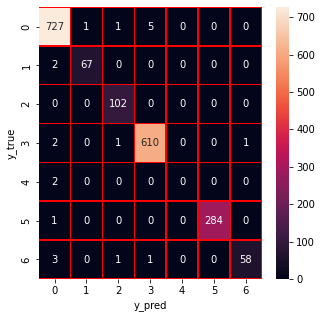

In [10]:

# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=100, learning_rate=0.1)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Preparing Central Server's Dataset:

In [11]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

# Central Server:
A central server is a key component in Federated Learning. It acts as a hub that aggregates the updates from multiple edge devices and uses them to improve the overall model. The central server is responsible for coordinating the training process and managing the communication between edge devices.

The central server receives the model updates from edge devices, which are trained on their local data, and uses them to update the global model. This process is called model averaging, where the central server takes the average of all the updates received from the edge devices to improve the global model. The central server can also use other techniques to aggregate the updates such as weight averaging or voting.

The central server also plays a crucial role in maintaining the security and privacy of the data. It acts as a gatekeeper for the edge devices and controls the access to the data. It also ensures that the edge devices are compliant with the security protocols.

In summary, the central server is responsible for coordinating and managing the training process in Federated Learning, by aggregating the updates from multiple edge devices, maintaining the security and privacy of the data and controlling the access to the data. It plays a crucial role in the deployment of Federated Learning systems.

> Code For Central Server:

0:	learn: 1.5089355	total: 118ms	remaining: 11.6s
1:	learn: 1.2800965	total: 205ms	remaining: 10s
2:	learn: 1.1165352	total: 291ms	remaining: 9.4s
3:	learn: 0.9855056	total: 397ms	remaining: 9.53s
4:	learn: 0.8866911	total: 484ms	remaining: 9.19s
5:	learn: 0.8038287	total: 576ms	remaining: 9.03s
6:	learn: 0.7308220	total: 675ms	remaining: 8.97s
7:	learn: 0.6656912	total: 765ms	remaining: 8.8s
8:	learn: 0.6119779	total: 853ms	remaining: 8.63s
9:	learn: 0.5692534	total: 971ms	remaining: 8.73s
10:	learn: 0.5265341	total: 1.07s	remaining: 8.64s
11:	learn: 0.4896503	total: 1.16s	remaining: 8.53s
12:	learn: 0.4567223	total: 1.25s	remaining: 8.37s
13:	learn: 0.4233921	total: 1.35s	remaining: 8.29s
14:	learn: 0.3911583	total: 1.44s	remaining: 8.14s
15:	learn: 0.3697629	total: 1.53s	remaining: 8.03s
16:	learn: 0.3478279	total: 1.62s	remaining: 7.89s
17:	learn: 0.3278679	total: 1.7s	remaining: 7.76s
18:	learn: 0.3095715	total: 1.8s	remaining: 7.7s
19:	learn: 0.2967063	total: 1.89s	remaining: 7.5

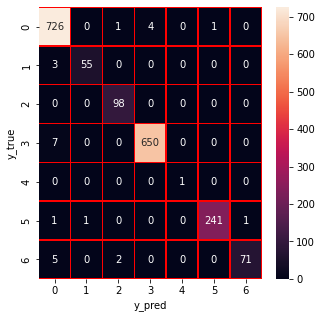

In [12]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Analysis of the models:
Accuracy is a commonly used metric to evaluate the performance of machine learning models. In Federated Learning, the accuracy of the three systems, Edge Device 1, Edge Device 2 and the central server, can be used to evaluate the performance of the overall system.

The accuracy of the Edge Devices can be calculated by comparing the predictions made by the local models trained on the edge devices with the true labels of the test data. Similarly, the accuracy of the central server can be calculated by comparing the predictions made by the global model with the true labels of the test data.

A high accuracy for the Edge Devices and the central server indicates that the models are able to correctly classify the test data, and therefore have a good performance. However, it is also important to consider other evaluation metrics such as precision, recall, and F1-score, to get a more comprehensive understanding of the performance of the models.

Comparing the accuracy of the three systems can help to evaluate the performance of the overall system and identify potential issues such as overfitting or bias. It also can be used to evaluate the effect of different configurations and techniques used in Federated Learning such as data sampling, data aggregation, and model averaging on the performance of the system.

In [13]:
# Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.992617980490377
Accuracy of Edge Device 2:  0.9887640449438202
Accuracy of Central Server:  0.9860813704496788


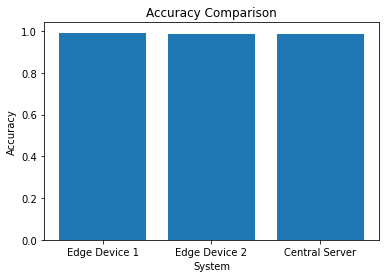

In [14]:

systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [edge1_acc, edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('System')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In conclusion, Federated Learning is a powerful method for training machine learning models that allows for large and diverse datasets to be used without compromising the privacy of users. The three main components of Federated Learning are edge devices, central servers, and virtual edge devices. Edge devices are responsible for training local models using their own data, central servers aggregate updates from the edge devices to improve the global model, and virtual edge devices are used to simulate and test the behavior of edge devices in a controlled environment. Accuracies of the three systems are important metric to evaluate the performance of the overall system.